In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import preprocessing

In [3]:
file = pd.read_pickle("../../Youth_Recidivism_Project/Dataset/train.pickle")

In [4]:
Yes_rate = file[['STAFF','YES']]
comments = file[['STAFF','total_notes']]

In [5]:
group_count = Yes_rate.groupby('STAFF').count()
group_count.columns = ['yes_count']
group_sum = Yes_rate.groupby("STAFF").sum()
group_sum.columns = ['yes_sum']

In [16]:
#Name  YES
#John   1
#John   0
#John   1
#John   0
#Alex   1
#Alex   0

In [18]:
#Name sum  count
#John  2    4
#Alex  1    2

In [6]:
group_notes = comments.groupby("STAFF").agg(lambda x: " ".join(x))

In [7]:
new_data = group_notes.join(group_count)
new_data = new_data.join(group_sum)

In [8]:
new_data['yes_rate'] = new_data['yes_sum']/new_data['yes_count']

In [9]:
new_data = new_data.sort_values(by='yes_rate', ascending=False)

In [9]:
#new_data.to_csv("notes_groupby_staff.csv")

In [10]:
#take the five most successful caseworker and compare wtih five worst caseworker

In [10]:
good_dictionary = {}
bad_dictionary = {}
for i in range(60):
    good_note = new_data['total_notes'][i]
    good_note = good_note.split(" ")
    bad_note = new_data['total_notes'][new_data.shape[0]-i-1]
    bad_note = bad_note.split(" ")
    for j in good_note:
        if j not in good_dictionary:
            good_dictionary[j] = 1
        else:
            good_dictionary[j] += 1
    for k in bad_note:
        if k not in bad_dictionary:
            bad_dictionary[k] = 1
        else:
            bad_dictionary[k] += 1
    

In [11]:
print(new_data)

                                                          total_notes  \
STAFF                                                                   
Shamily L Ortiz     Picked up client at school to take to an app a...   
Stephanie Edouazin  Client visited office to meet with this writer...   
Maria Riley         Spoke to Victor at apartment, unpacked and set...   
Peter Vann          Youth scheduled check-in at the Lynn D.O. in t...   
Phil Hindin         Writer met with youth at request of RCC in ord...   
...                                                               ...   
Christian Mitchell  discharge meeting at carney hospital- trinidy ...   
Tracy Castelli      Caseworker met with Yovanski at the TILP progr...   
Darryl D Brown      This writer went to AM's house with the attemp...   
Nicholas Cotto      Forward the 9.14.15 collateral contacts to Nic...   
Alicia Linton       On the above date CW Linton met with youth DK ...   

                    yes_count  yes_sum  yes_rate  

In [12]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
for i in bad_dictionary:
    if i.lower() in stopwords:
        bad_dictionary[i] = 0
for i in good_dictionary:
    if i.lower() in stopwords:
        good_dictionary[i] = 0
bad_dic = dict(sorted(bad_dictionary.items(), key=lambda item: item[1], reverse = True)[:100])
good_dic = dict(sorted(good_dictionary.items(), key=lambda item: item[1], reverse = True)[:100])


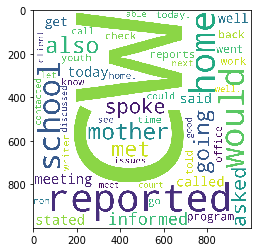

In [13]:
import matplotlib.pylab as plt
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(good_dic)
plt.imshow(wc)

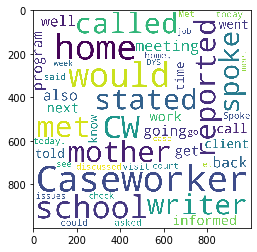

In [14]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bad_dic)
plt.imshow(wc)
